In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
boston = datasets.load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
X = boston.data
y = boston.target

In [5]:
X.shape

(506, 13)

In [6]:
y.shape

(506,)

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
XRM = X[:, 5]
XRM.shape

(506,)

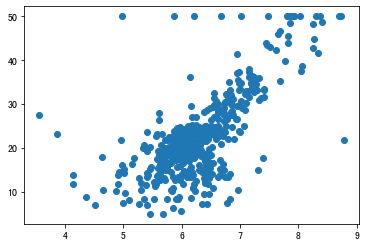

In [9]:
plt.scatter(XRM, y)
plt.show()

In [10]:
XRM = XRM[y < 50.0]
y = y[y < 50.0]

In [11]:
XRM.shape

(490,)

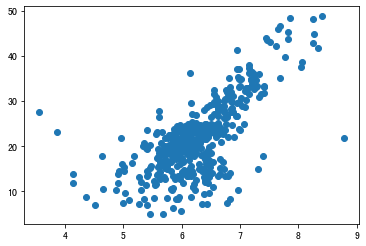

In [12]:
plt.scatter(XRM, y)
plt.show()

In [13]:
from ML_Package.train_test_split import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XRM, y)
X_train.shape

(392,)

In [14]:
X_test.shape

(98,)

In [15]:
from ML_Package.LinearRegression import LinearRegression

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
lr.a_, lr.b_

(8.403988125791063, -30.666255419454952)

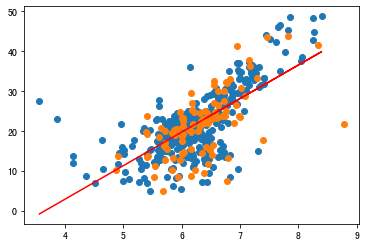

In [18]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = 'r')
plt.scatter(X_test, y_test)
plt.show()

In [19]:
y_hat = lr.predict(X_test)
from math import sqrt
MSE = np.sum((y_hat - y_test) ** 2) / len(y_test)
MSE

40.89424993638748

In [20]:
rmse = sqrt(MSE)
rmse

6.394861213223277

In [21]:
mae = np.sum(np.absolute(y_hat - y_test)) / len(y_test)
mae

4.714525240895079

In [22]:
def mse(y_hat, y_test):
    return np.sum((y_hat - y_test) ** 2) / len(y_test)

In [23]:
def r2_score(y_hat, y_test):
    return 1 - mse(y_hat, y_test) / np.var(y_test)

In [24]:
r2_score(y_hat, y_test)

0.36402195314763885

In [25]:
lr.score(X_test, y_test)

0.36402195314763885